In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import seaborn as sns

# Data Cleaning and Dimensionality Reduction implementing PCA

In [2]:
data = pd.read_csv("Project_Data_2.csv", index_col=0, thousands=',')
data = pd.DataFrame(data)
data.index.names = ['Country']
data.columns.names = ['Year']
print(data.isnull().sum())
pca = PCA(n_components=2)
pca.fit(data)
data_2d = pca.transform(data)
data_df_2d = pd.DataFrame(data_2d)
data_df_2d.index = data.index
data_df_2d.columns = ['PC1', 'PC2']
features = range(pca.n_components)
print(pca.explained_variance_ratio_)

Year
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64
[0.91808789 0.060556  ]


# Scatter Plot based on PCA for finding country with highest trade  largest importers of the goods

([<matplotlib.axis.XTick at 0x1b52452d130>,
 <a list of 2 Text major ticklabel objects>)

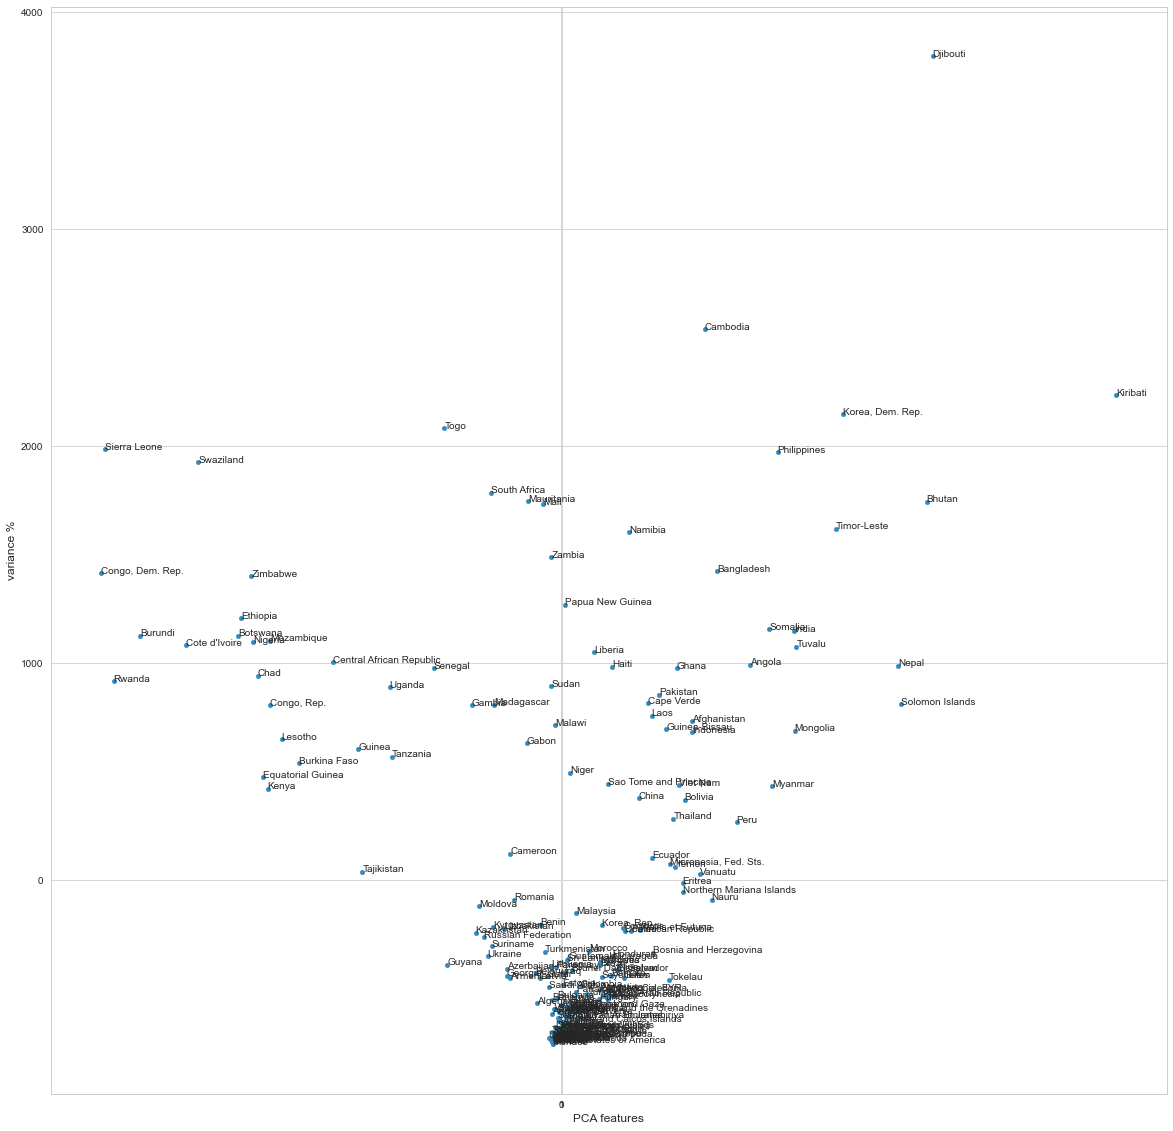

In [18]:
ax = data_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(20,20))
for i, country in enumerate(data.index):
    ax.annotate(country, (data_df_2d.iloc[i].PC2, data_df_2d.iloc[i].PC1))
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# KMeans Elbow Curve for finding number of clusters

([<matplotlib.axis.XTick at 0x1b5225d8a90>,
 <a list of 9 Text major ticklabel objects>)

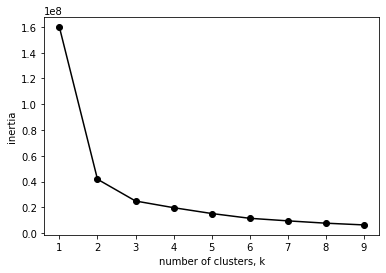

In [4]:
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_df_2d)
    inertias.append(model.inertia_)
plt.plot(ks,inertias,'-o',color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

# Hierarchical Clustering based on PCA

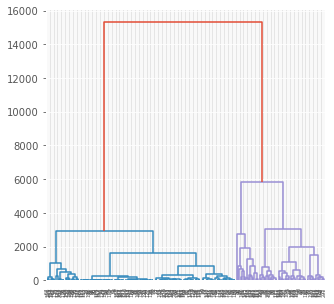

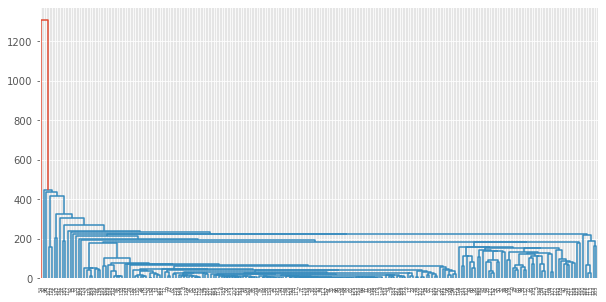

In [5]:
plt.rcParams['figure.figsize'] = (5,5)
plt.style.use('ggplot')
f1 = data_df_2d['PC1'].values
f2 = data_df_2d['PC2'].values
X = np.array(list(zip(f1, f2)))
Z = linkage(X, 'ward')
fig = plt.figure(figsize = (5,5))
dn = dendrogram(Z)
z = linkage(X, 'single')
fig = plt.figure(figsize = (10,5))
dn = dendrogram(z)

# KMeans for plotting countries with largest import of good clusters based on clusters and scale

[[-5.04868749e+02  1.64683497e+01 -7.77156117e-16]
 [ 1.12806611e+03 -3.67964688e+01  1.00000000e+00]]
[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1]
<class 'numpy.ndarray'>
{0: 143, 1: 64}


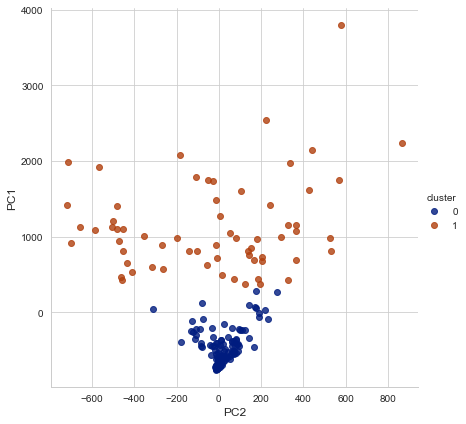

In [14]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data_df_2d)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_,return_counts = True)
print(dict(zip(unique,counts)))
data_df_2d['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('PC2','PC1',data=data_df_2d,hue='cluster',palette='dark',height=6,aspect=1,fit_reg=False)

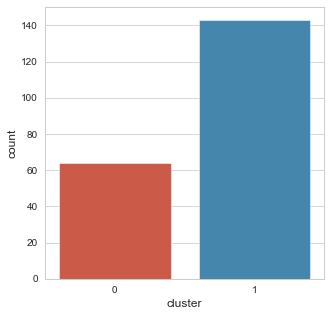

In [12]:
sns.countplot(data_df_2d['cluster'],label="Count")

In [ ]:
### As we can see that clusters from Elbow curve is 2 hence based on that both the count plot and lmplot are drawn. 
### Country with largest importer for good is Djibouti